In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

el_toro = wood[wood['Name'] == 'El Toro']
print(wood)

     Rank            Name                       Park               Location  \
0       1    Boulder Dash             Lake Compounce         Bristol, Conn.   
1       2         El Toro  Six Flags Great Adventure          Jackson, N.J.   
2       3         Phoenix  Knoebels Amusement Resort          Elysburg, Pa.   
3       4      The Voyage              Holiday World      Santa Claus, Ind.   
4       5     Thunderhead                  Dollywood    Pigeon Forge, Tenn.   
..    ...             ...                        ...                    ...   
175    46       Megafobia                    Oakwood   Pembrookshire, Wales   
176    47       Hades 360              Mount Olympus  Wisconsin Dells, Wis.   
177    48     Mine Blower                   Fun Spot        Kissimmee, Fla.   
178    49  Wooden Warrior      Quassy Amusement Park      Meddlebury, Conn.   
179    50         Twister  Knoebels Amusement Resort          Elysburg, Pa.   

               Supplier  Year Built  Points  Year o

In [4]:
steel_parks = steel.filter(items = ['Park', 'Points']).groupby('Park').sum().sort_values(by = ['Points'], ascending=False) 
steel.groupby(['Name']).size()

Name
Alpengeist          3
Apollo’s Chariot    6
Banshee             3
Behemoth            3
Bizarro             4
                   ..
Verbolten           1
Whizzer             3
Wicked Cyclone      3
Wild Eagle          1
X2                  3
Length: 63, dtype: int64

In [5]:
wood.groupby(['Supplier']).size()
wood.groupby(['Year of Rank']).size()
wood.groupby(['Name']).size()

Name
American Thunder    3
Balder              4
Beast               2
Blue Streak         6
Boardwalk Bullet    3
                   ..
Wild One            1
Wildfire            3
Wodan               3
Wood Coaster        1
Wooden Warrior      3
Length: 61, dtype: int64

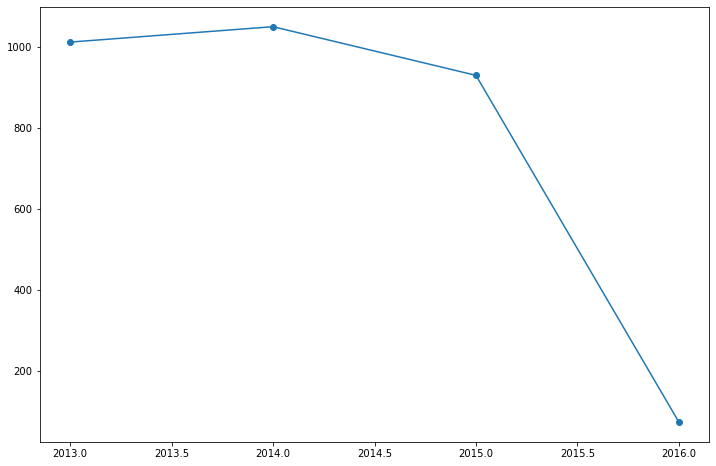

In [15]:
steel_coaster_rank = steel[['Name', 'Points', 'Year of Rank']]
bizarro = steel_coaster_rank[steel_coaster_rank['Name'] == 'Bizarro']
f, ax = plt.subplots(figsize = (12, 8))
ax.plot( bizarro['Year of Rank'], bizarro['Points'], marker = 'o')




     Rank              Name         Park        Location Supplier  Year Built  \
0       1  Millennium Force  Cedar Point  Sandusky, Ohio  Intamin        2000   
10      1  Millennium Force  Cedar Point  Sandusky, Ohio  Intamin        2000   
20      1  Millennium Force  Cedar Point  Sandusky, Ohio  Intamin        2000   
31      2  Millennium Force  Cedar Point  Sandusky, Ohio  Intamin        2000   
81      2  Millennium Force  Cedar Point  Sandusky, Ohio  Intamin        2000   
131     2  Millennium Force  Cedar Point  Sandusky, Ohio  Intamin        2000   

     Points  Year of Rank  
0      1204          2013  
10     1139          2014  
20     1205          2015  
31     1122          2016  
81     1129          2017  
131    1156          2018  


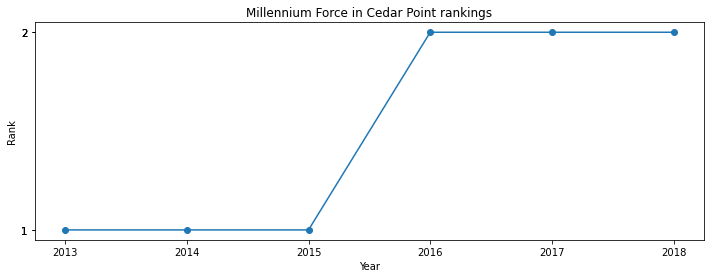

In [34]:
def coaster_rank(coaster_name, park_name, df):
    coaster_rankings = df[(df['Name'] == coaster_name) & (df['Park'] == park_name)]
    f, ax = plt.subplots(figsize = (12, 4))
    ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], marker = 'o')
    ax.set_xticks(coaster_rankings['Year of Rank'])
    ax.set_yticks(coaster_rankings['Rank'])
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(coaster_name + ' in ' + park_name + ' rankings')
    
coaster_rank('Millennium Force', 'Cedar Point', steel)
    
    

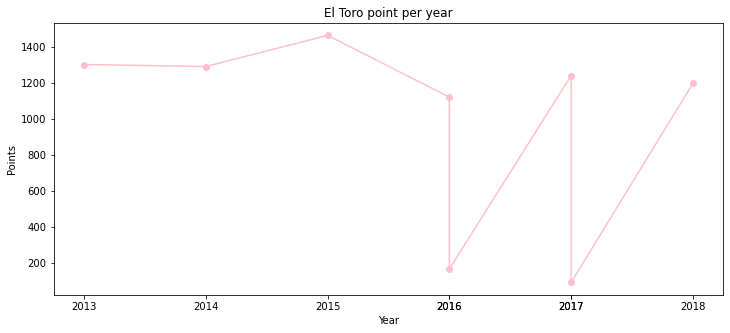

In [45]:
def coaster_points(coaster_name, df):
    coaster_rankings = df[df['Name'] == coaster_name]
    f, ax = plt.subplots(figsize = (12, 5))
    ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Points'], marker = 'o', color = 'pink')
    ax.set_xticks(coaster_rankings['Year of Rank'])
    
    plt.xlabel('Year')
    plt.ylabel('Points')
    plt.title(coaster_name +  ' point per year')
    
coaster_points('El Toro', wood)

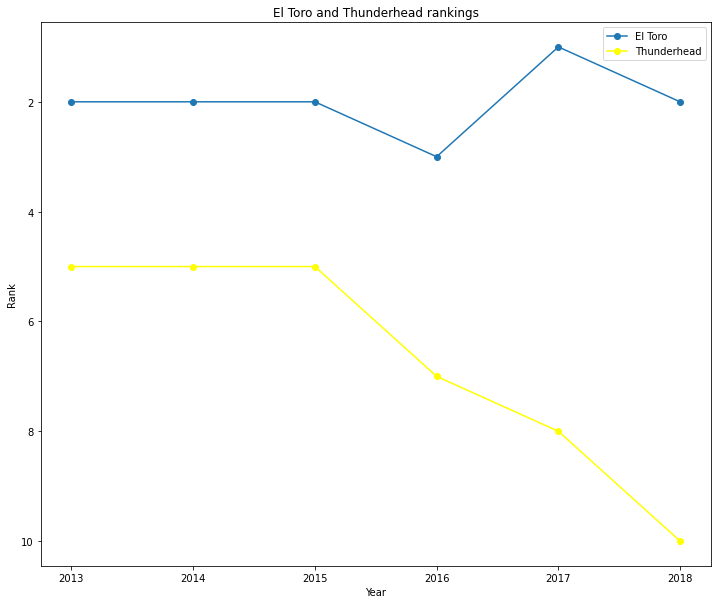

In [26]:
def coasters_rank(name1,park_name_1, name2, park_name_2,  df):
    coaster_rankings_1 = df[(df['Name'] == name1) & (df['Park'] == park_name_1)]
    coaster_rankings_2 = df[(df['Name'] == name2) & (df['Park'] == park_name_2)]
    f, ax = plt.subplots(figsize = (12, 10)b)
    ax.plot(coaster_rankings_1['Year of Rank'], coaster_rankings_1['Rank'], marker = 'o', label = name1)
    ax.plot(coaster_rankings_2['Year of Rank'], coaster_rankings_2['Rank'], marker = 'o', color = 'yellow', label = name2)
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(name1 + ' and ' + name2 + ' rankings')
    plt.legend()
   
coasters_rank('El Toro', 'Six Flags Great Adventure', 'Thunderhead', 'Dollywood', wood)

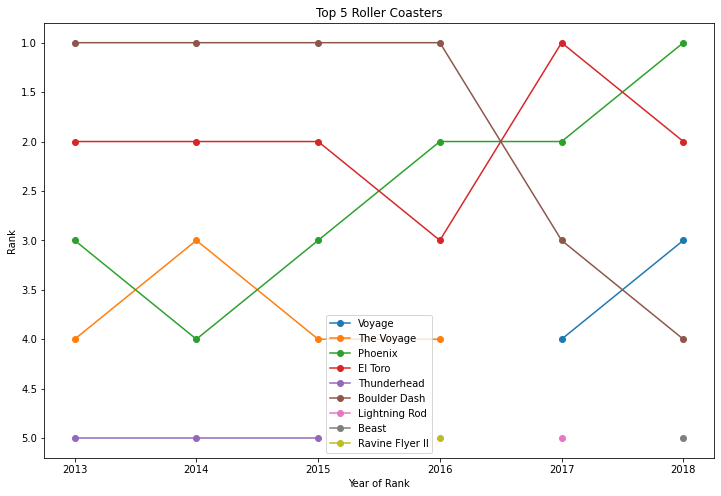

In [40]:
def top_rankings (n, df):
    top_n = df[df['Rank'] <= n]
    f, ax = plt.subplots(figsize = (12, 8))
    for coaster in set(top_n['Name']):
      coaster_rankings = top_n[top_n['Name'] == coaster]
      ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster, marker = 'o')
    ax.legend()
    ax.invert_yaxis()
    plt.title('Top ' + str(n) + ' Roller Coasters' )
    plt.xlabel('Year of Rank')
    plt.ylabel('Rank')
top_rankings (5, wood)